In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings("ignore")

In [2]:
from platform import python_version
print(python_version())

3.8.6


## Load popANI values

In [3]:
df_ani = pd.read_csv("data/popANI_wide_format.csv", index_col=0)
df_ani = df_ani[[col for col in df_ani.columns if col.startswith('MSK')]]
df_ani = df_ani.loc[df_ani.columns]
df_ani = -np.log10(1-(df_ani))  # convert popANI to number of digit "9"
df_ani = df_ani.replace({np.inf:10}) # if popANI=1, we assume it has 10 digit "9"
df_ani.head()

,MSK1,MSK1004,MSK1015,MSK1082,MSK1090,MSK1119,MSK1129,MSK1191,MSK1241,MSK1258,...,MSK813,MSK814,MSK815,MSK844,MSK846,MSK848,MSK850,MSK891,MSK923,MSK925
MSK1,10.000000,6.815484,10.000000,3.618632,3.616919,5.570594,5.570593,4.201497,3.621148,3.620367,...,4.152713,3.582718,3.617346,3.637334,3.600374,3.561956,3.562979,3.597945,3.595666,3.596715
MSK1004,6.815484,10.000000,10.000000,3.616628,3.614924,5.547587,5.547587,4.200034,3.618983,3.618163,...,4.148262,3.581188,3.615677,3.635480,3.598930,3.560334,3.561353,3.595492,3.593133,3.594220
MSK1015,10.000000,10.000000,10.000000,3.614223,3.612624,5.539658,5.539655,4.200407,3.616565,3.615971,...,4.152051,3.578465,3.612915,3.636273,3.596468,3.558224,3.559370,3.593594,3.591248,3.592154
MSK1082,3.618632,3.616628,3.614223,10.000000,10.000000,3.607824,3.612707,3.656777,5.346191,5.339361,...,3.645093,3.666694,5.135921,3.628187,4.430915,3.730222,3.732029,3.785092,3.780424,3.784209
MSK1090,3.616919,3.614924,3.612624,10.000000,10.000000,3.606242,3.610961,3.655191,5.351346,5.351346,...,3.643570,3.665941,5.135933,3.627370,4.429888,3.728054,3.729977,3.782630,3.777664,3.781749


## Load isolate metadata

In [4]:
isolates = [[1, 'MSK65', 'blood'],[1, 'MSK67', 'blood'],[1, 'MSK1', 'feces'],[1, 'MSK2', 'feces'],[1, 'MSK17', 'feces'],[1, 'MSK18', 'feces'],[1, 'MSK33', 'feces'],
            [1, 'MSK34', 'feces'],[1, 'MSK49', 'feces'],[1, 'MSK51', 'feces'],[2, 'MSK478', 'blood'],[2, 'MSK247', 'feces'],[2, 'MSK249', 'feces'],[2, 'MSK250', 'feces'],
            [2, 'MSK264', 'feces'],[2, 'MSK265', 'feces'],[2, 'MSK281', 'feces'],[2, 'MSK282', 'feces'],[2, 'MSK296', 'feces'],[2, 'MSK297', 'feces'],[2, 'MSK314', 'feces'],
            [2, 'MSK315', 'feces'],[3, 'MSK1191', 'blood'],[3, 'MSK485','blood'],[3, 'MSK620', 'feces'],[3, 'MSK624', 'feces'],[3, 'MSK520', 'feces'],[3, 'MSK522','feces'],
            [3, 'MSK543', 'feces'],[3, 'MSK544', 'feces'],[4, 'MSK794', 'blood'],[4, 'MSK2162', 'feces'],[4, 'MSK2161', 'feces'],[4, 'MSK2159', 'feces'],
            [5, 'MSK2390', 'blood'],[5, 'MSK2646', 'feces'],[5, 'MSK2647', 'feces'],[5, 'MSK2648', 'feces'],[5, 'MSK2649', 'feces']]
df_iso = pd.DataFrame(isolates, columns=['PatientID','IsolateID','Source'])
df_iso.head()

,PatientID,IsolateID,Source
0,1,MSK65,blood
1,1,MSK67,blood
2,1,MSK1,feces
3,1,MSK2,feces
4,1,MSK17,feces


## Plot popANI matrix of isolates per patient

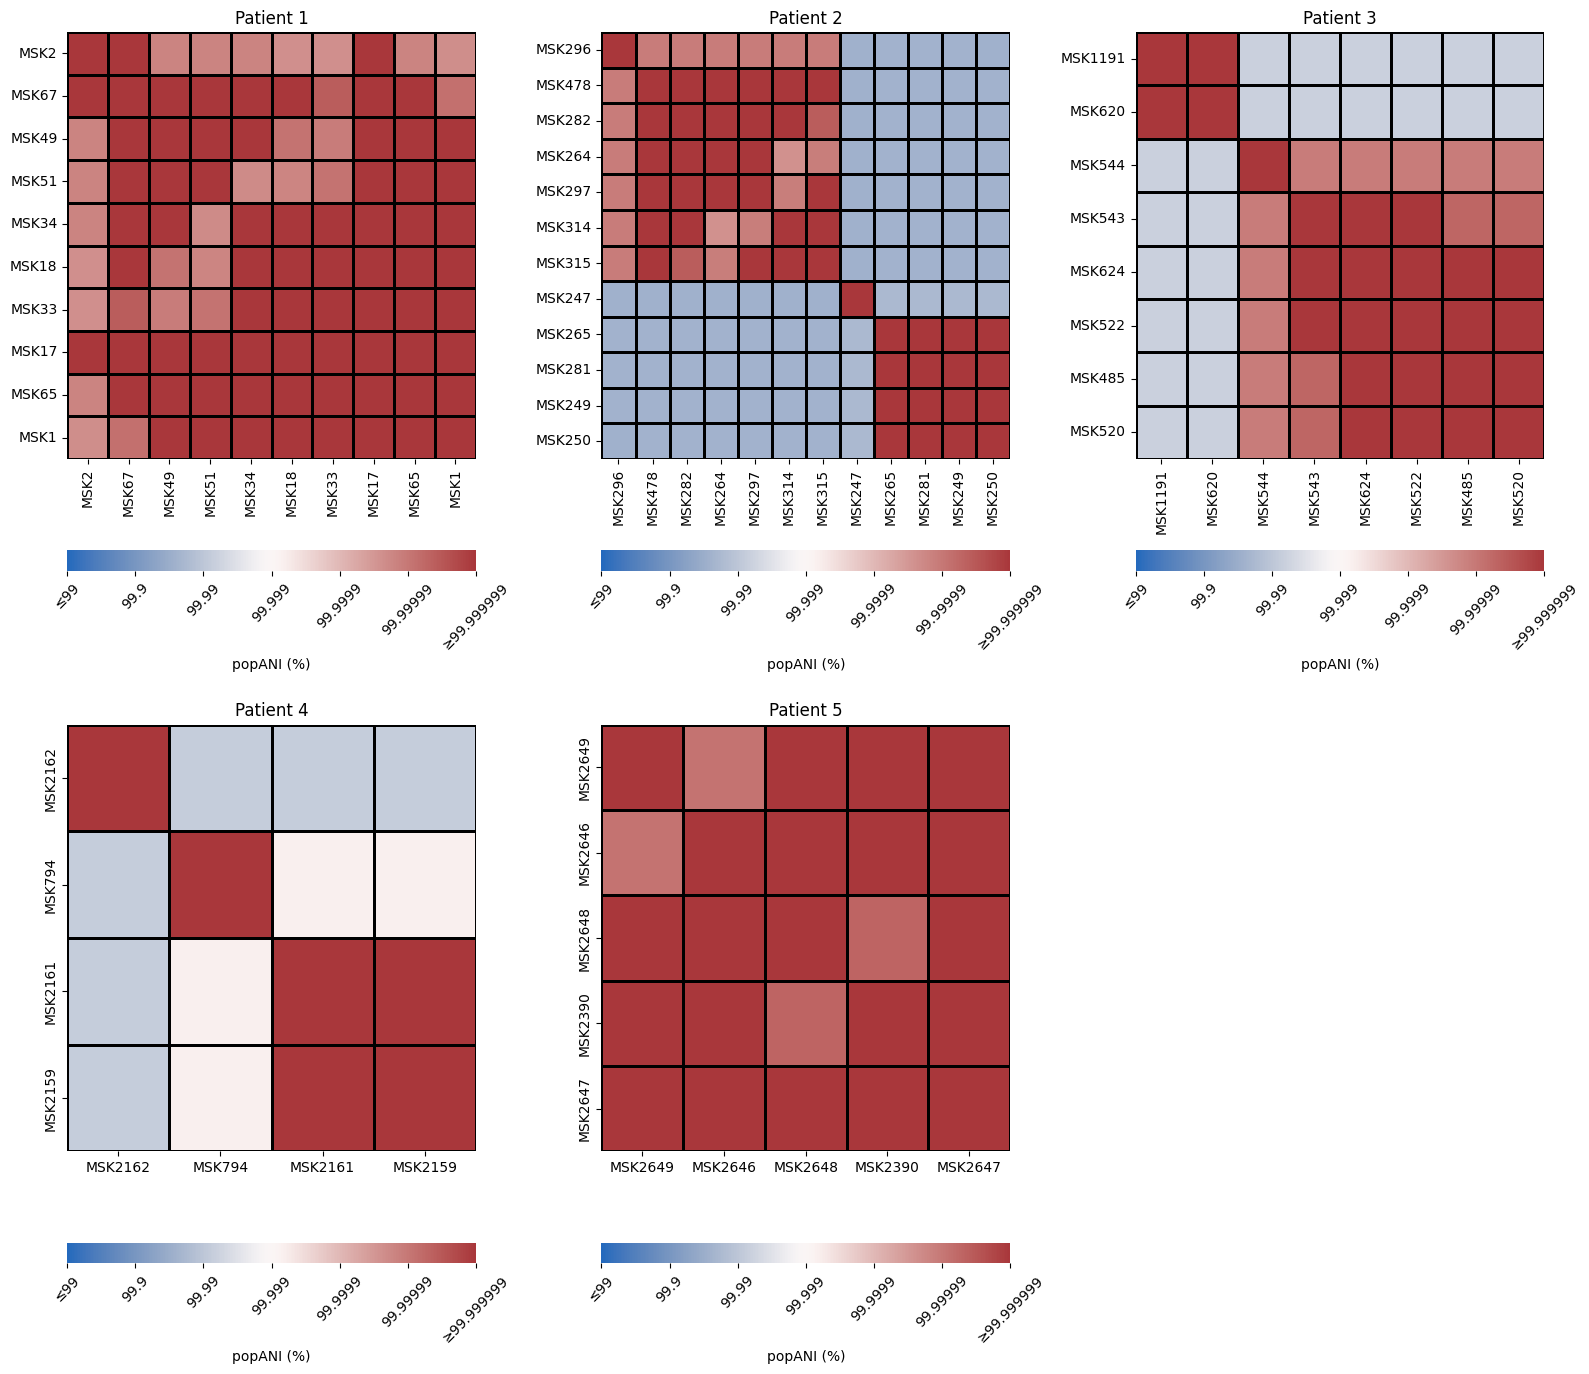

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16,14))

for pid in [1,2,3,4,5]:
    row = int((pid-1)/3)
    col = (pid-1) % 3
    isolates = list(df_iso[df_iso.PatientID==pid].IsolateID)
    df_heatmap = df_ani.loc[isolates, isolates]
    Y = sch.linkage(df_heatmap.values, method='centroid')
    Z = sch.dendrogram(Y, orientation='right')
    index = Z['leaves']
    df_heatmap = df_heatmap.iloc[index,index]
    _ = sns.heatmap(
        df_heatmap,
        ax=ax[row, col],
        cbar_kws={"orientation": "horizontal"},
        vmin=2,
        vmax=8,
        cmap="vlag",
        linewidth=1,
        linecolor='k'
    )
    _ = ax[row,col].set_title('Patient %d'%pid)
    _ = ax[row,col].collections[0].colorbar.set_label("popANI (%)")
    _ = ax[row,col].collections[0].colorbar.set_ticks([2,3,4,5,6,7,8])
    _ = ax[row,col].collections[0].colorbar.set_ticklabels(["≤99","99.9","99.99","99.999","99.9999","99.99999","≥99.999999"], rotation=45)
    
_ = ax[1,2].set_visible(False)
plt.tight_layout()
plt.savefig("output/ANI_heatmap_per_patient.png", dpi=600, bbox_inches='tight')